In [1]:
from operator import xor
from os import O_TRUNC
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")



from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import mean

import prediccion
import algoritmos

df = pd.read_csv('diamonds.csv')


## Informacion de los Datos <br>
Descripción
Conjunto de datos que contiene los precios y otros atributos de casi 54.000 diamantes. Las variables son las siguientes:

Formato
Un dataframe con 53940 filas y 10 variables:

Price (precio)
precio en dólares estadounidenses (\$326-\$18.823)

Carat (quilate)
peso del diamante (0,2-5,01)

Cut (talla)
calidad de la talla (Fair/regular, Good/buena, Very Good/muy buena, Premium/superior, Ideal)

color
color del diamante, de D (mejor) a J (peor)

Clarity (claridad)
medida de la claridad del diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor))

x
longitud en mm (0-10,74)

y
anchura en mm (0-58,9)

z
profundidad en mm (0-31,8)

Depth (profundidad)
porcentaje de profundidad total = z / media(x, y) = 2 * z / (x + y) (43-79)

Table (tabla)
anchura de la parte superior del diamante en relación con el punto más ancho (43-95)


#### Detalles estadísticos del conjunto de datos: ( Recopilación de datos)

In [2]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Vemos que ninguna columna por suerte tiene datos nulos

# Limpieza de datos

#### Comprobar valores faltantes

In [5]:
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

Revisemos si existe campos iguales a 0 en algunas columnas

In [6]:
cols = df[df == 0].count(axis=0)
cols[cols > 0]

x     8
y     7
z    20
dtype: int64

In [7]:
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0) ]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Sin embargo aplicar alguna estrategia para que ya no sean 0 no es buena idea porque se trata de vectores asi que los dejamos asi

# Analisis de datos <br>
Comencemos por el rango

In [8]:
print(f'El rango es: {df["price"].max() - df["price"].min()}')

El rango es: 18497


Medidas de asimetría

# Outliers

Obtenemos primero las columnas numericas 

In [9]:
columnas_numericas = df.select_dtypes(include=['int', 'float']).columns.tolist()
columnas_numericas.remove('price')
columnas_numericas

['carat', 'depth', 'table', 'x', 'y', 'z']

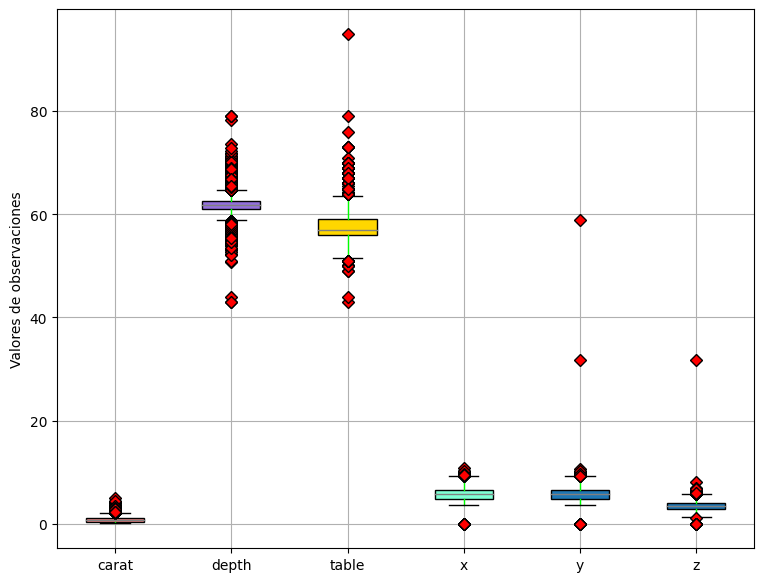

In [10]:

dataframe = df.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']]
# Primer acercamiento a la detección de outliers mediante boxplot utilizando todas las columnas numéricas...
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 7))
labels = ['carat', 'depth', 'table', 'x', 'y', 'z']
red_diamond = dict(markerfacecolor='r', marker='D')
bplot = ax1.boxplot(dataframe.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"]),
                    vert=True,
                    patch_artist=True,
                    labels=labels,
                    capprops=dict(color="black"),
                    medianprops=dict(color="grey"),
                    whiskerprops=dict(color="lime"),
                    flierprops=red_diamond)
colors = ['lightcoral', 'mediumpurple', 'gold','aquamarine']
for patch, color in zip(bplot['boxes'], colors):
 patch.set_facecolor(color)
for ax in [ax1]:
 ax.yaxis.grid(True)
 ax.xaxis.grid(True)
 ax.set_ylabel('Valores de observaciones')
plt.show() 

los rombos rojos representan los valores atípicos (outliers) en los datos. A simple vista pareciera que por cada columna contamos con varios valores atipicos no? Vamos a seguir con en analisis uno por uno para determinar que hacer con ellos

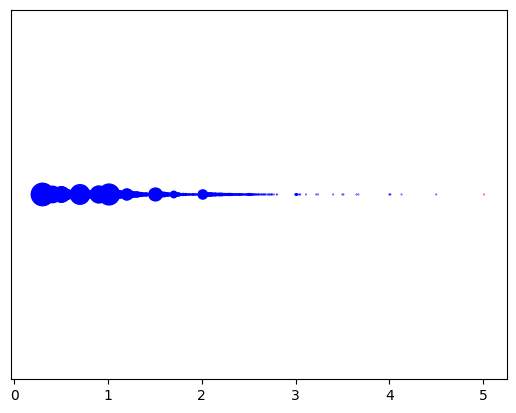

In [11]:

def outliersVisualPuntos(columna) :
    variable, counts = np.unique(df[columna], return_counts=True)
    sizes = counts*0.10
    colors = ['blue']*len(variable)
    colors[-1] = 'red'
    plt.axhline(1, color='k', linestyle='')
    plt.scatter(variable, np.ones(len(variable)), s=sizes, color=colors)
    plt.yticks([])
    plt.show()

outliersVisualPuntos('carat')




In [12]:
# Puntuación Z = (punto_datos - media) / desviación estándar
# ayuda a comprender qué tan lejos está el punto de datos de la media. Y después de configurar un valor 
# de umbral, se pueden utilizar los valores de puntuación z de los puntos de datos para definir los valores atíp


def puntuacionZdeUnaVariableInd(variable):
    z = np.abs(stats.zscore(df[variable]))
    return z

zCarat = puntuacionZdeUnaVariableInd('carat')
zCarat


0        1.198168
1        1.240361
2        1.198168
3        1.071587
4        1.029394
           ...   
53935    0.164427
53936    0.164427
53937    0.206621
53938    0.130927
53939    0.101137
Name: carat, Length: 53940, dtype: float64

In [13]:
# para definir un valor de umbral atípico, se elige que generalmente es 3.0. 
def cantidadDeValoresAtipicosEnLaColumna(z,nombreColumna) :
    threshold = 3
    a = np.where(z > threshold)
    cantidad_elementos = len(a[0])
    print("Cantidad de valores atipicos en la columna "+nombreColumna+" :", cantidad_elementos)
    return cantidad_elementos


cantidadDeValoresAtipicosEnLaColumna(zCarat,'carat')

Cantidad de valores atipicos en la columna carat : 439


439

Veamos los valores atipicos de todas las variables independientes

In [14]:
lista = ['carat', 'depth', 'table', 'x', 'y', 'z']
cantidadDeOutliders = 0
for element in lista :
    z= puntuacionZdeUnaVariableInd(element)
    cantidadDeValoresAtipicos = cantidadDeValoresAtipicosEnLaColumna(z,element)
    cantidadDeOutliders= cantidadDeOutliders + cantidadDeValoresAtipicos
print("cantidad total de valores atipicos en el df :" , cantidadDeOutliders)

Cantidad de valores atipicos en la columna carat : 439
Cantidad de valores atipicos en la columna depth : 685
Cantidad de valores atipicos en la columna table : 336
Cantidad de valores atipicos en la columna x : 43
Cantidad de valores atipicos en la columna y : 34
Cantidad de valores atipicos en la columna z : 55
cantidad total de valores atipicos en el df : 1592


Veamos con cuantos registros cuenta nuestros dataframe (Aunque esto ya lo sabemos de antemano)

In [15]:
num_filas = df.shape[0]
print("Número de filas:", num_filas)

Número de filas: 53940


ahora veamos la cantidad de variables independientes que consideramos para hacer el analisis de datos outliders

In [16]:
len(lista)

6

Cuantos datos hay en total teniendo en cuenta solo la lista ['carat', 'depth', 'table', 'x', 'y', 'z'] 

In [17]:
numeroDeDatos = num_filas*len(lista)
numeroDeDatos

323640

Ahora de esos datos que porcentaje son outliders

In [18]:
porcentajeDeOutliders=  (cantidadDeOutliders*100)/numeroDeDatos
print("el porcentaje de outilders es del ",porcentajeDeOutliders,"%")

el porcentaje de outilders es del  0.49190458534173775 %


El porcentaje de datos outliers en las columnas ['carat', 'depth', 'table', 'x', 'y', 'z'] es solo del 0.49%. A pesar de ser considerados anomalías, estos valores atípicos representan  alciertas gunas características  de algunos diamantes que influyen en su precio. Por lo tanto, en este TP se ha decidido  mantenerlos para preservar la integridad de los datos. Se reconoce  que estas anomalías son relevantes en la industria de los diamantes y pueden proporcionar información valiosa sobre las variaciones en los precios de cada diamante

# Análisis Bivariado/Multivariado

Consiste en comparar pares de variables para intentar encontrar algún tipo de
relación . esta información
es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, qué variables presentan relaciones de tipo no
lineal

In [19]:
#gráfico de pares: es una matriz de diagramas de dispersión que permite comprender la relación por pares 
# entre diferentes variables en un conjunto de datos.



##pairplot = sns.pairplot(df, hue='cut')

#Mostrar el gráfico
##pairplot.fig.show()



Si en el gráfico de dispersión generado por sns.pairplot(df), se puede ver  una relación lineal entre las variables "x" y "y" con respecto a la variable "price", esto podria  significa que existe una asociación lineal entre esas variables. En otras palabras, a medida que los valores de "x" aumentan, los valores de "y" también tienden a aumentar o disminuir de manera lineal, y esto a su vez tiene un impacto en los valores de "price".

Este tipo de relación lineal entre "x", "y" y "price" puede ser útil en el análisis de datos, ya que indica que "x" y "y" pueden ser buenos predictores de "price" en un modelo de regresión lineal. Esto significa que se puede utilizar una ecuación lineal para predecir los valores de "price" en función de los valores de "x" y "y".


In [20]:


#pairplotCUT = sns.pairplot(df, hue='cut')

# Mostrar el gráfico
#pairplotCUT.fig.show()

#### Matriz de correlación

Muestra el grado de correlaciones, de cada variable en el conjunto de datos, con cada otra variable en el conjunto de datos. Es una representación de todos estos coeficientes de correlación de cada variable individual en los datos con cada otra variable en los datos.

El grado de correlación entre dos variables cualesquiera se representa de dos maneras, el color del cuadro o caja y el número dentro. Cuanto más fuerte sea el color, mayor será la magnitud de la correlación.

Cuanto más cerca esté el número de 1, mayor será la correlación. Si el número es positivo, establece una correlación positiva. Si es negativo establece una correlación negativa. 

1 y -1 establecen correlaciones perfectas entre las variables.

<Axes: >

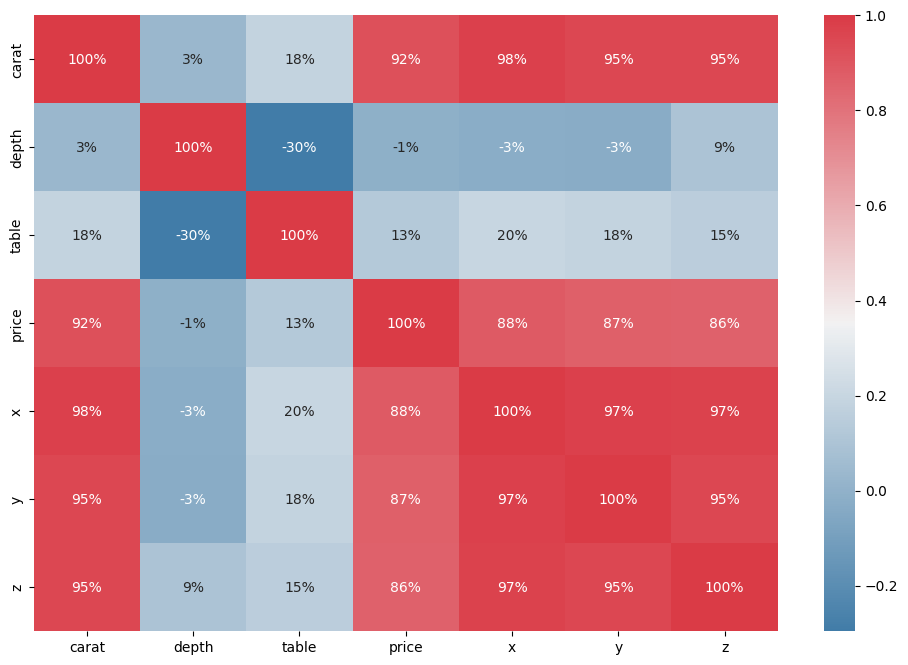

In [21]:
corr = df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 


table y depth tienen una correlacion baja con price. Procedemos a eliminarlos ya que  la capacidad predictiva es limitada.